In [16]:
import os

from keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [13]:
from keras import optimizers
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [8]:
train_dir = os.path.join('/flowers', 'train')
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),class_mode='categorical')

Found 3998 images belonging to 5 classes.


In [9]:
validation_dir = os.path.join('/flowers', 'test')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150, 150),class_mode='categorical')

Found 297 images belonging to 5 classes.


In [14]:
history = model.fit_generator(train_generator,epochs=20,validation_data=validation_generator)

<ipython-input-14-49ebdeb37ead>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=20,validation_data=validation_generator)


Epoch 1/20
125/125 [==============================] - 101s 783ms/step - loss: 1.2994 - acc: 0.4240 - val_loss: 1.0809 - val_acc: 0.5589
Epoch 2/20
125/125 [==============================] - 94s 752ms/step - loss: 1.0183 - acc: 0.5900 - val_loss: 0.9165 - val_acc: 0.6532
Epoch 3/20
125/125 [==============================] - 89s 712ms/step - loss: 0.8580 - acc: 0.6626 - val_loss: 0.8314 - val_acc: 0.6835
Epoch 4/20
125/125 [==============================] - 87s 694ms/step - loss: 0.7314 - acc: 0.7189 - val_loss: 0.8164 - val_acc: 0.6936
Epoch 5/20
125/125 [==============================] - 88s 701ms/step - loss: 0.6678 - acc: 0.7479 - val_loss: 0.9076 - val_acc: 0.6835
Epoch 6/20
125/125 [==============================] - 87s 693ms/step - loss: 0.5867 - acc: 0.7824 - val_loss: 0.8617 - val_acc: 0.6970
Epoch 7/20
125/125 [==============================] - 88s 705ms/step - loss: 0.4614 - acc: 0.8292 - val_loss: 0.9878 - val_acc: 0.6869
Epoch 8/20
125/125 [==============================] - 

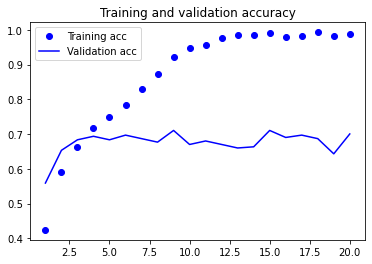

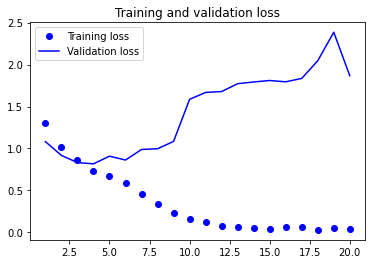

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
a=cv2.imread('rose.jpg')
a=cv2.resize(a,(150,150))/250
a=np.expand_dims(a,axis=0)

In [27]:
pred = model.predict(a)
label = np.argmax(pred)
label
# model.predict_classes(a)

2

In [29]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}